In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sympy import symbols, cos, sin
from sympy.plotting import plot_parametric
from math import sin,cos
import io
import cv2
import pykalman
from scipy import optimize
import matplotlib as mpl
from numpy import array, arange, abs as np_abs
from numpy.fft import rfft, rfftfreq
from math import sin, pi
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.io import wavfile

# Лабораторная работа 3.1
C помощью метода наименьших квадратов рассчитан КИХ фильтр c линейной ФЧХ пропускающий только частоты в
диапазонах 50–150 Гц; 350–750 Гц; 900–1500 Г

In [3]:
hz = 8000
l = 0
r = 1
N = (r - l) * hz
x = np.linspace(l, r, N)

In [4]:
d = hz / N
fk = [d * pt for pt in range(int(-N / 2), int(N / 2))]

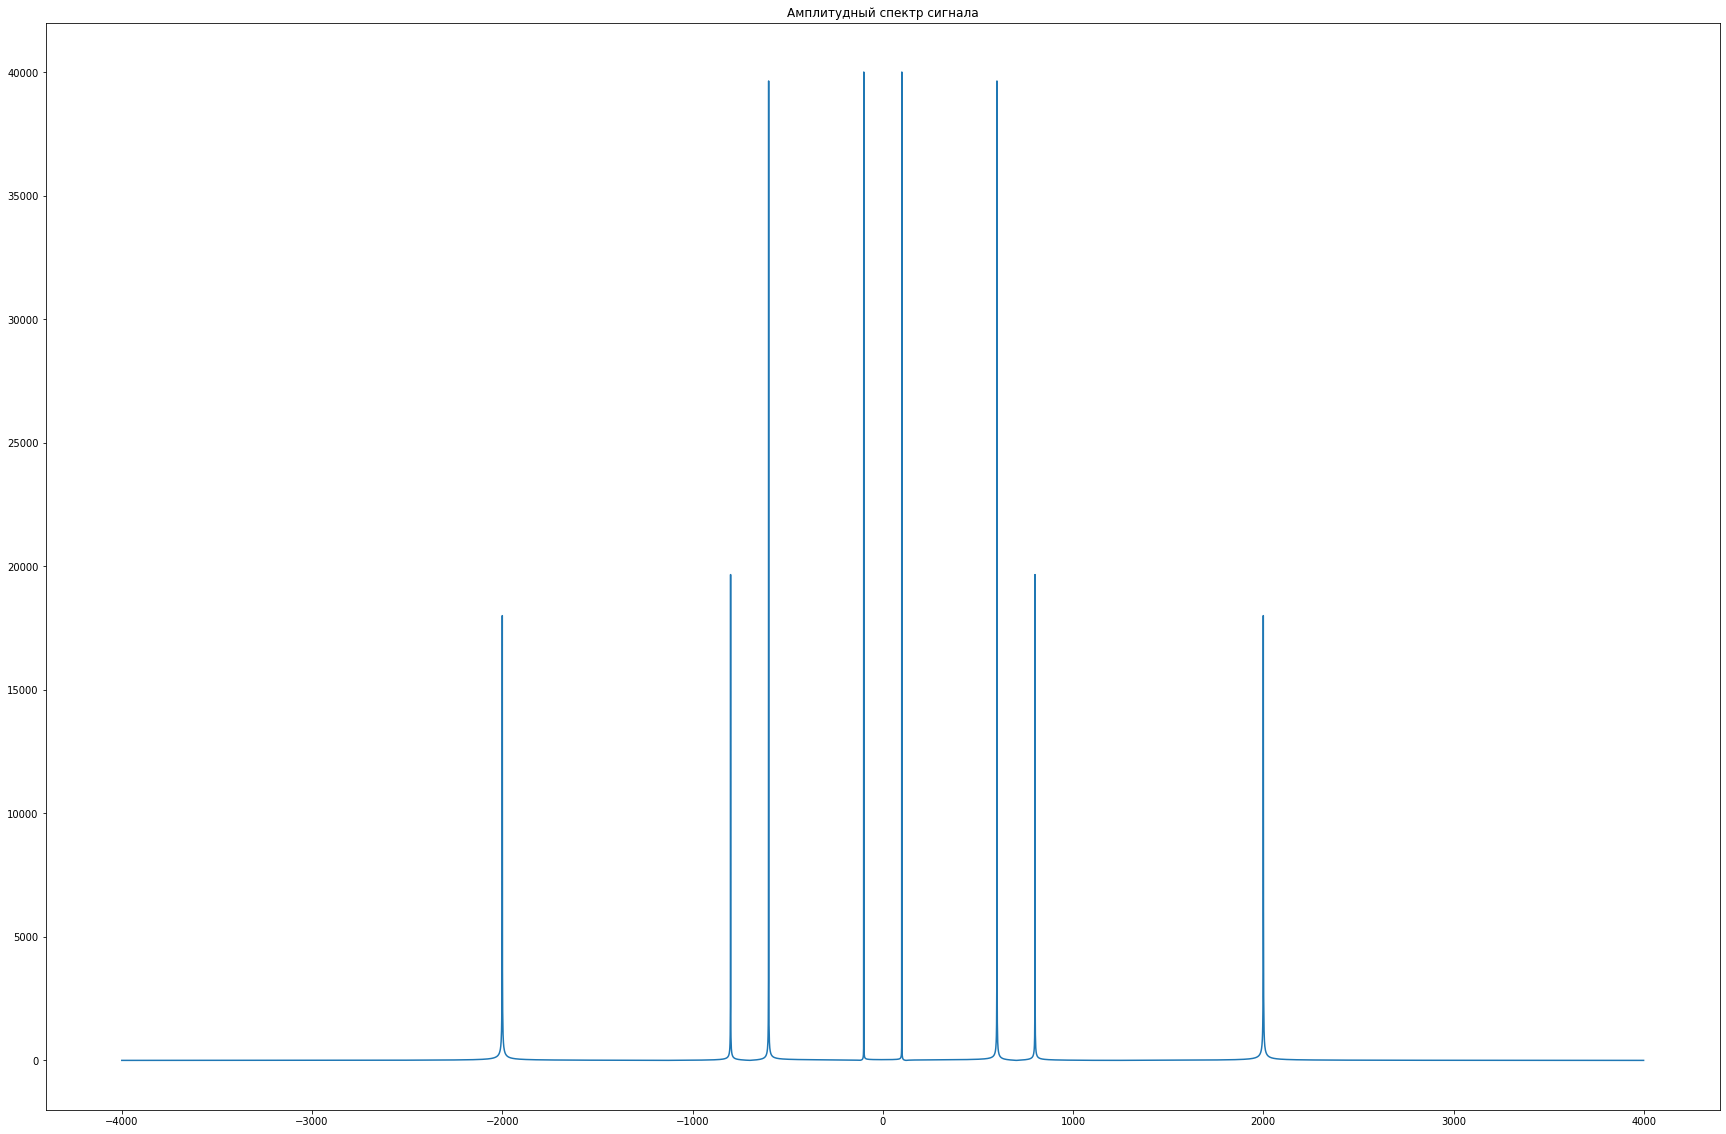

In [7]:
a = 10 # амплитуда компонент на пропускаемых частотах
a1 = 5 # амплитуда компонент на непропускаемых частотах

A1 = a
A2 = a1
A3 = a
A4 = a1
f1 = 100
f2 = 2000
f3 = 600
f4 = 800

x1 = [A1 * math.cos(2 * math.pi *  f1 * t) + A2 * math.cos(2 * math.pi * f2 * t) + A3 * math.cos(2 * math.pi * f3 * t) +
       A4 * math.cos(2 * math.pi *  f4 * t) for t in x]
ft = abs(np.fft.fftshift(np.fft.fft(x1)))

plt.figure(figsize=(30, 20))
plt.plot(fk, ft)

In [ ]:
min_fk = min(fk_8_khz)
fk_normed = [(2 * math.pi * (f - min_fk)) / Fs_8_khz for f in fk_8_khz]

In [ ]:
min_f = min(fk_normed)
max_f = max(fk_normed)
len_f = max(fk_normed) - min(fk_normed)

In [ ]:
Ad = list([1 if (fk >= 50 and fk <= 150) or (fk >= 350 and fk <= 750) or (fk >= 900 and fk <= 1500) else 0 for fk in fk_8_khz[4000:]])

In [ ]:
for i in range(4000):
    Ad.append(Ad[i])

for i in range(4000):
    Ad[i] = Ad[7999 - i]

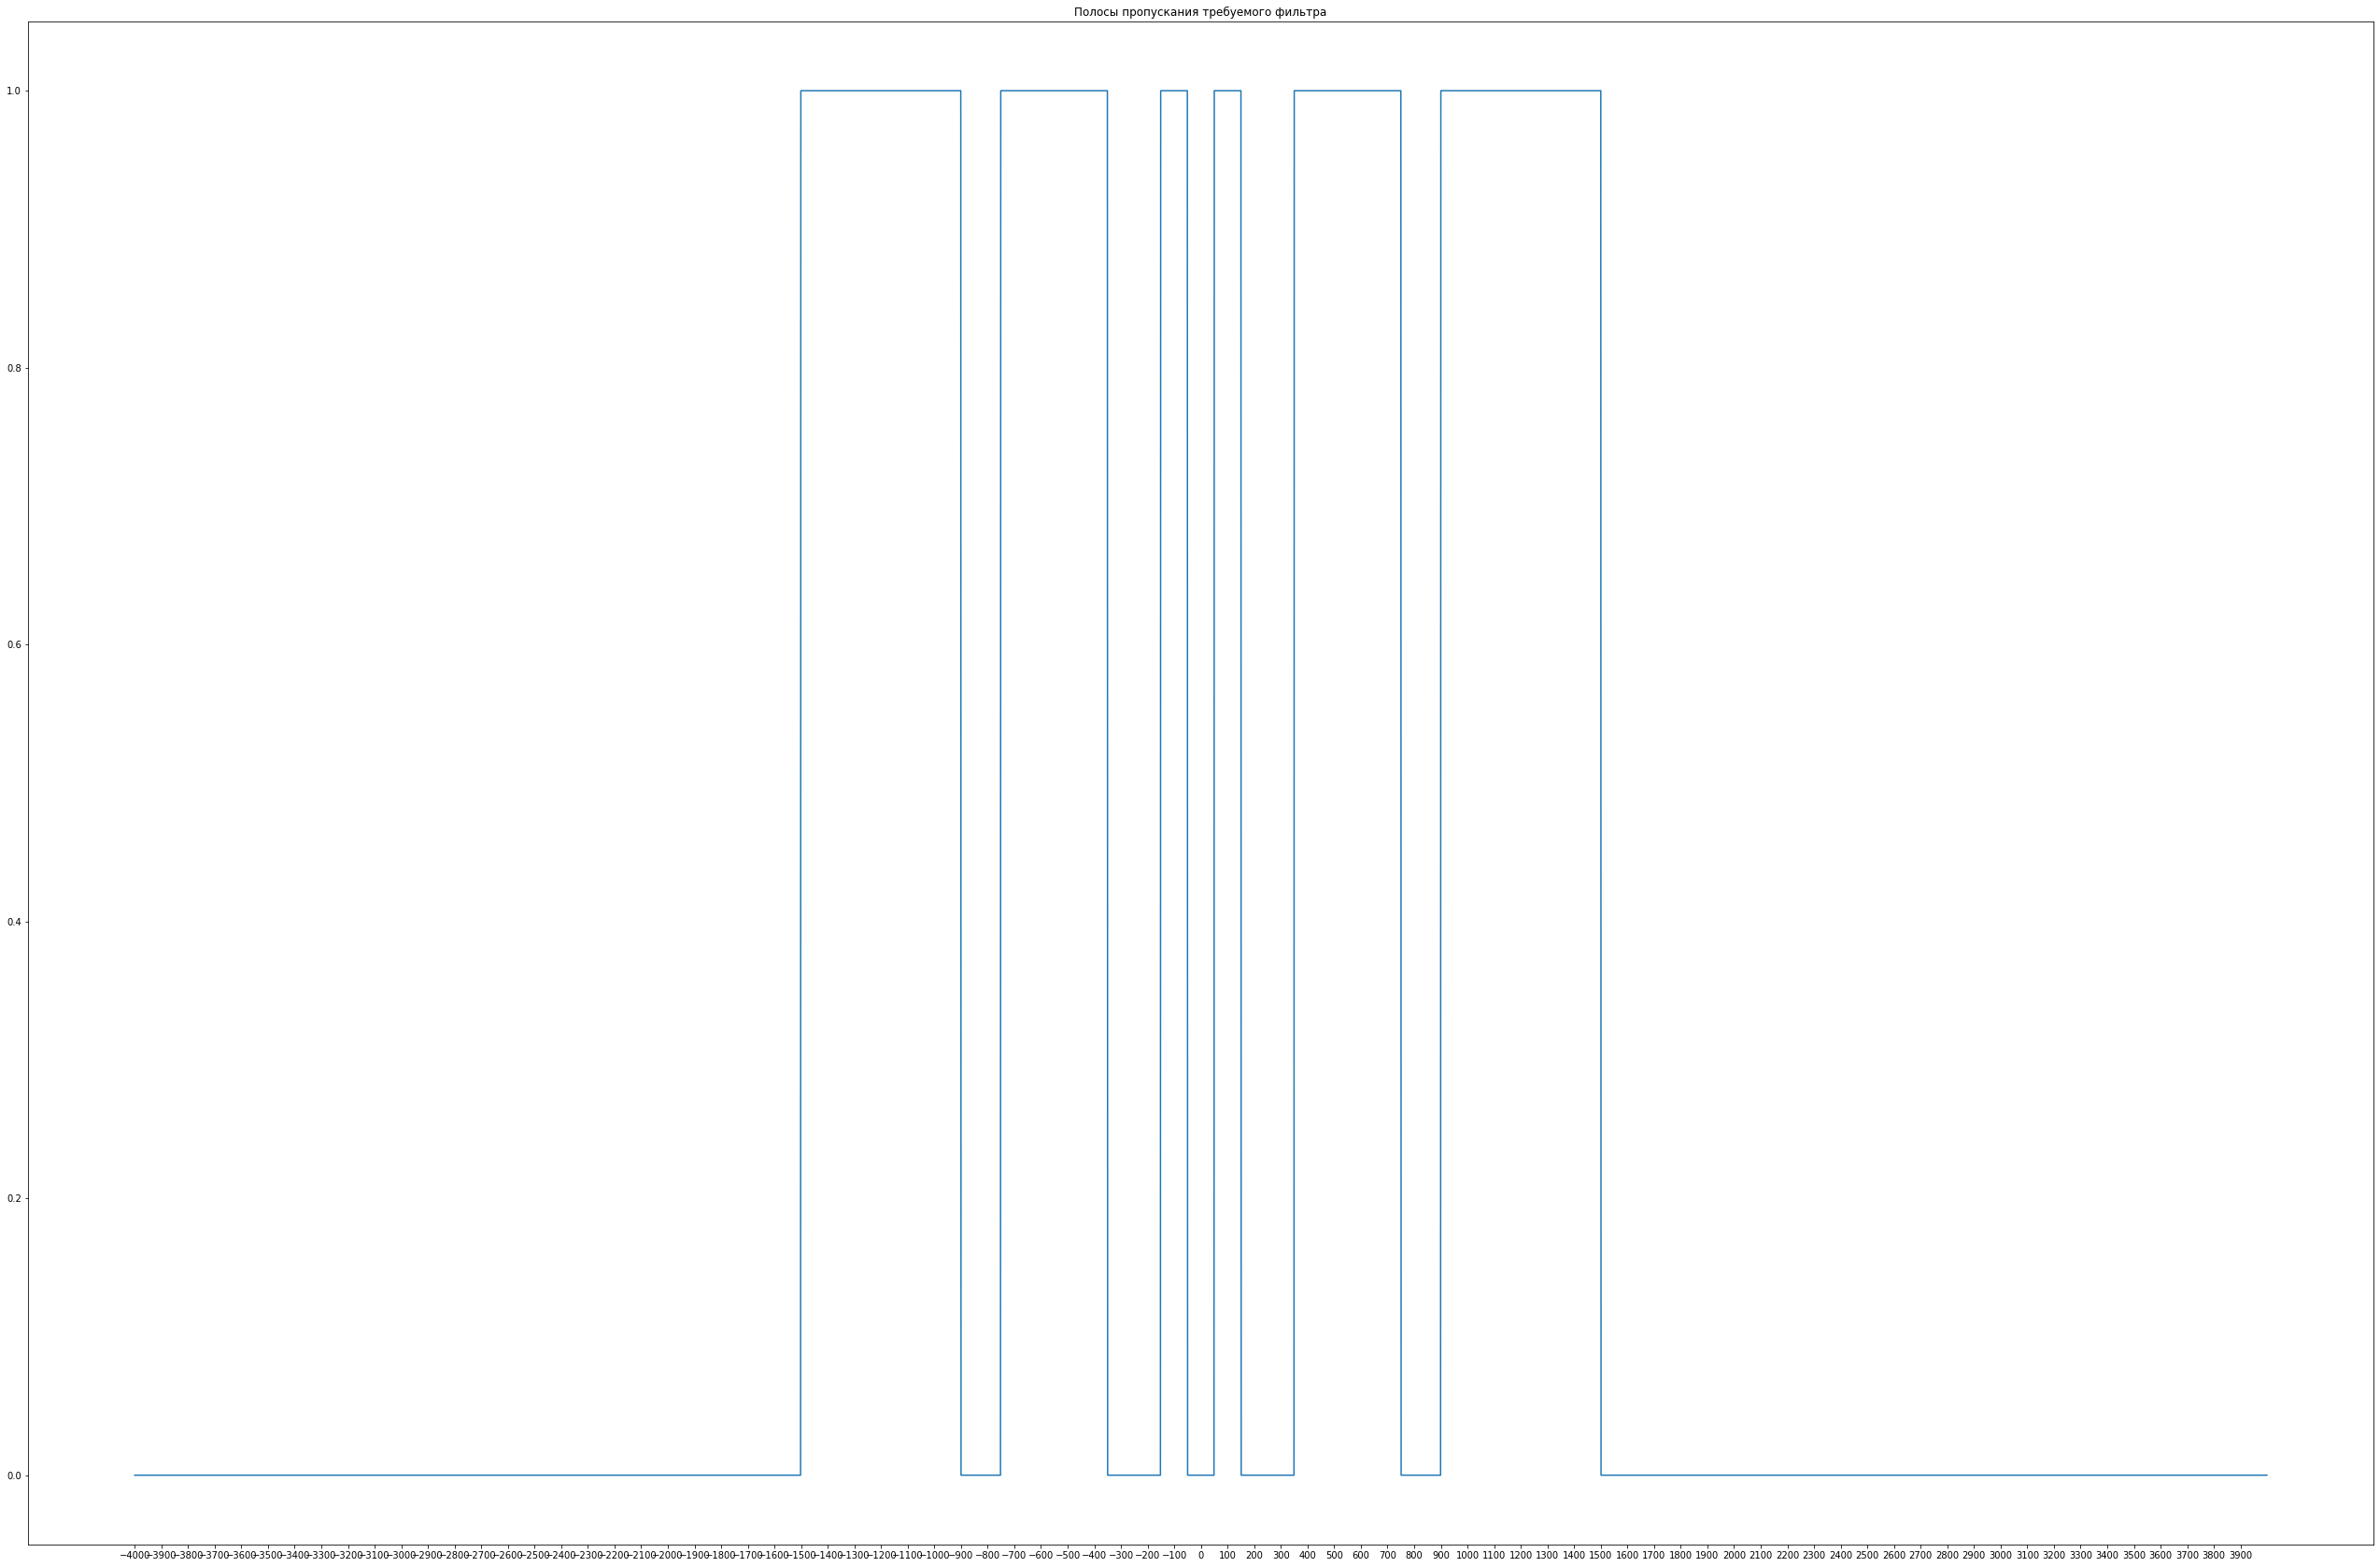

In [ ]:
x_s = np.arange(-4000, 4000, 100)

# график для контроля правильности построения фильтра
plt.figure(figsize=(45, 30))
plt.title("Полосы пропускания требуемого фильтра")
plt.xticks(x_s)
plt.plot(fk_8_khz, Ad)

In [ ]:
N = 111
M = int((N - 1) / 2)
L = 3 * M

In [ ]:
w_s = np.linspace(0, 2 * math.pi, L)

In [ ]:
step = int(8000 / L)

In [ ]:
F = np.array([[2 * math.cos(w_s[j] * (M - i)) if i < M else 1 for i in range(M + 1)] for j in range(L)])

In [ ]:
ad = list([1 if (w >= 2 * math.pi * 50 / Fs_8_khz and w <= 2 * math.pi * 150 / Fs_8_khz)
      or (w >= 2 * math.pi * 350 / Fs_8_khz and w <= 2 * math.pi * 750 / Fs_8_khz)
      or (w >= 2 * math.pi * 900 / Fs_8_khz and w <= 2 * math.pi * 1500 / Fs_8_khz) else 0 for w in w_s])

In [ ]:
for i in range(int(L/2)):
  ad[int(L/2) + i + 1] = ad[int(L/2) - i - 1]

#for i in range(int(L/2)):
 # ad[int(L/2) - i] = ad[int(L/2) + i]

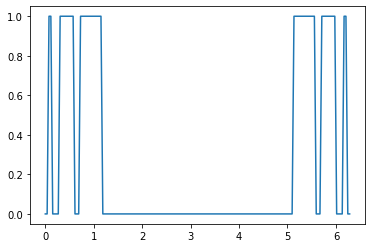

In [ ]:
plt.plot(w_s, ad)

In [ ]:
h_ = np.linalg.pinv(F) @ ad

In [ ]:
#h_full = [h_[i] if i < M else h_[M - i] for i in range(2 * M + 1)]
h_full = [h_[i] if i <= M else h_[2 * M - i] for i in range(2 * M + 1)]

In [ ]:
res_sig = np.convolve(x_1, h_full, mode="same")

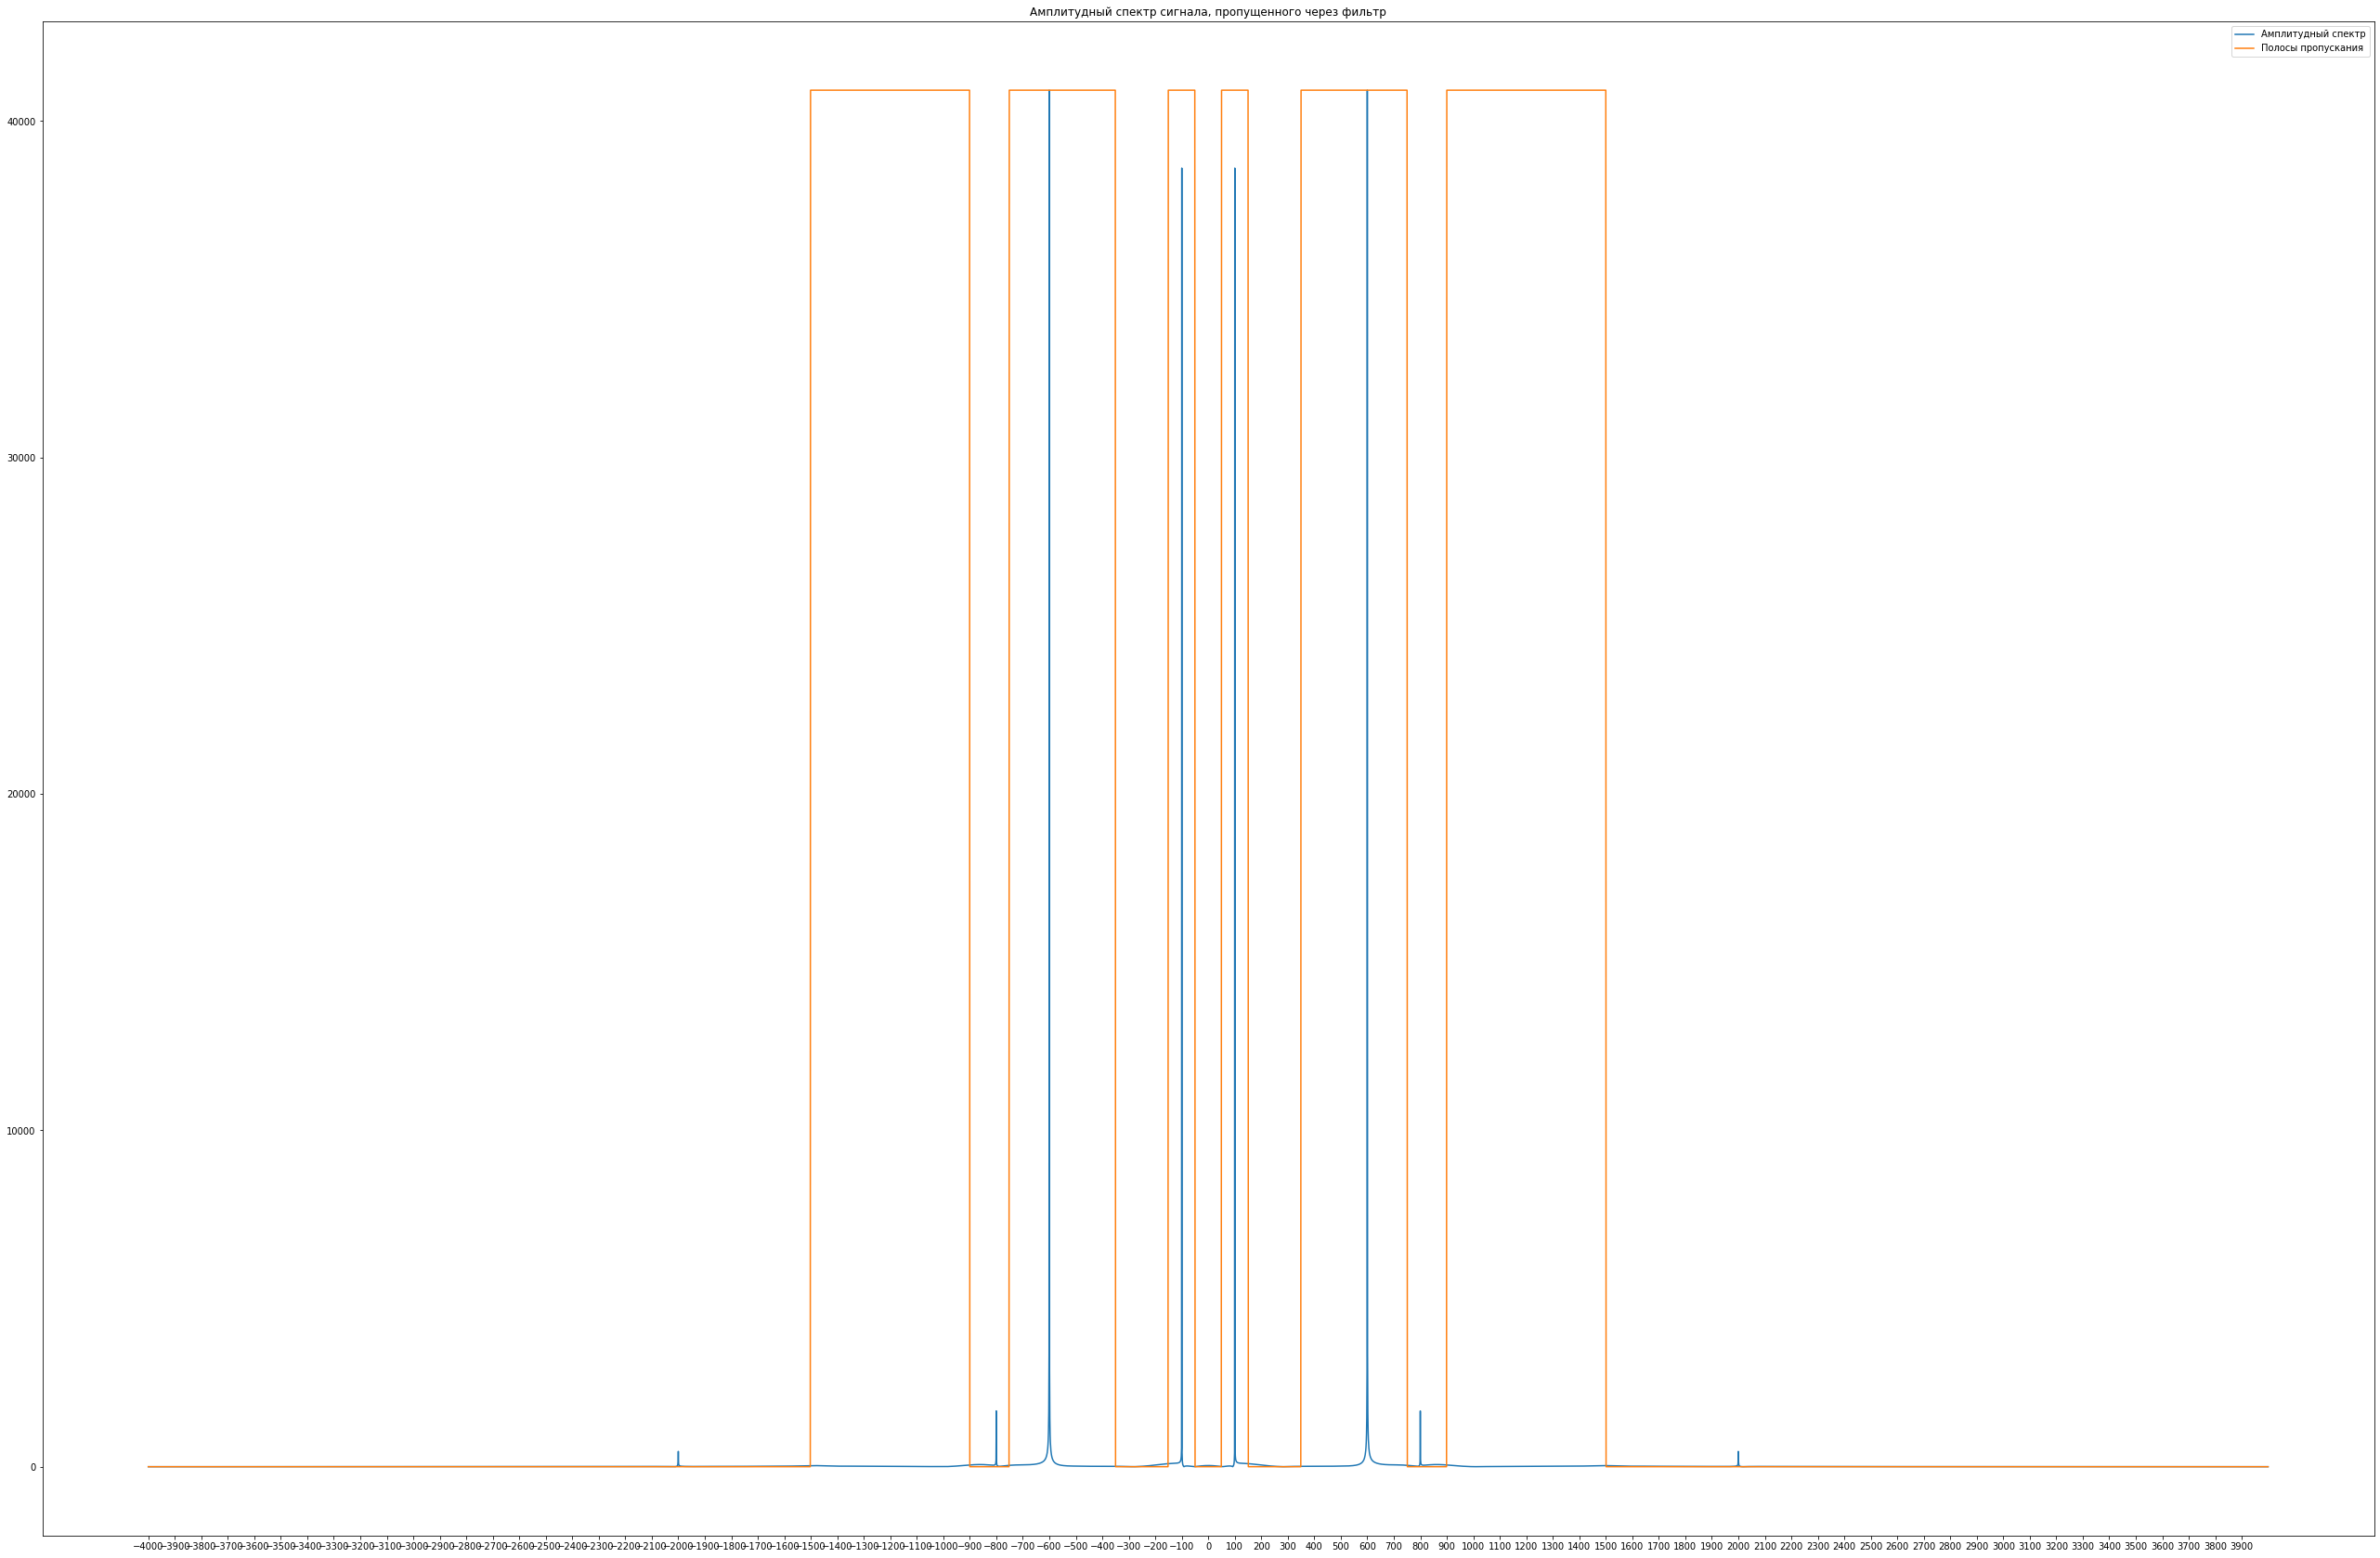

In [ ]:
discr_fourier_pts_res = abs(np.fft.fftshift(np.fft.fft(res_sig)))
max_dfp = max(discr_fourier_pts_res)
Ad_max = [a * max_dfp for a in Ad] # нормализация Ad для вывода полос пропускания (изначально Ad принимает только значения 0/1)

plt.figure(figsize=(45, 30))
plt.title("Амплитудный спектр сигнала, пропущенного через фильтр")
plt.xticks(x_s)
plt.plot(fk_8_khz, discr_fourier_pts_res)
plt.plot(fk_8_khz, Ad_max)
plt.legend(["Амплитудный спектр", "Полосы пропускания"])

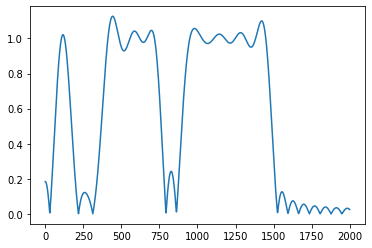

In [ ]:
from scipy import signal
w, H = signal.freqz(h_full,1,np.linspace(0,2000,1000),fs=8000)
plt.plot(w,abs(H))

In [ ]:
# расчёт кожффициентов фильтра с помощью готовой функции
des = list([1 if (fk >= 50 and fk <= 150) or (fk >= 350 and fk <= 750) or (fk >= 900 and fk <= 1500) else 0 for fk in fk_8_khz[4000:]])
h_fun = signal.firls(N * 2 + 1, np.linspace(0, 4000, 4000), des, fs=8000)

In [ ]:
res_sig_fun = np.convolve(x_1, h_fun, mode="same")

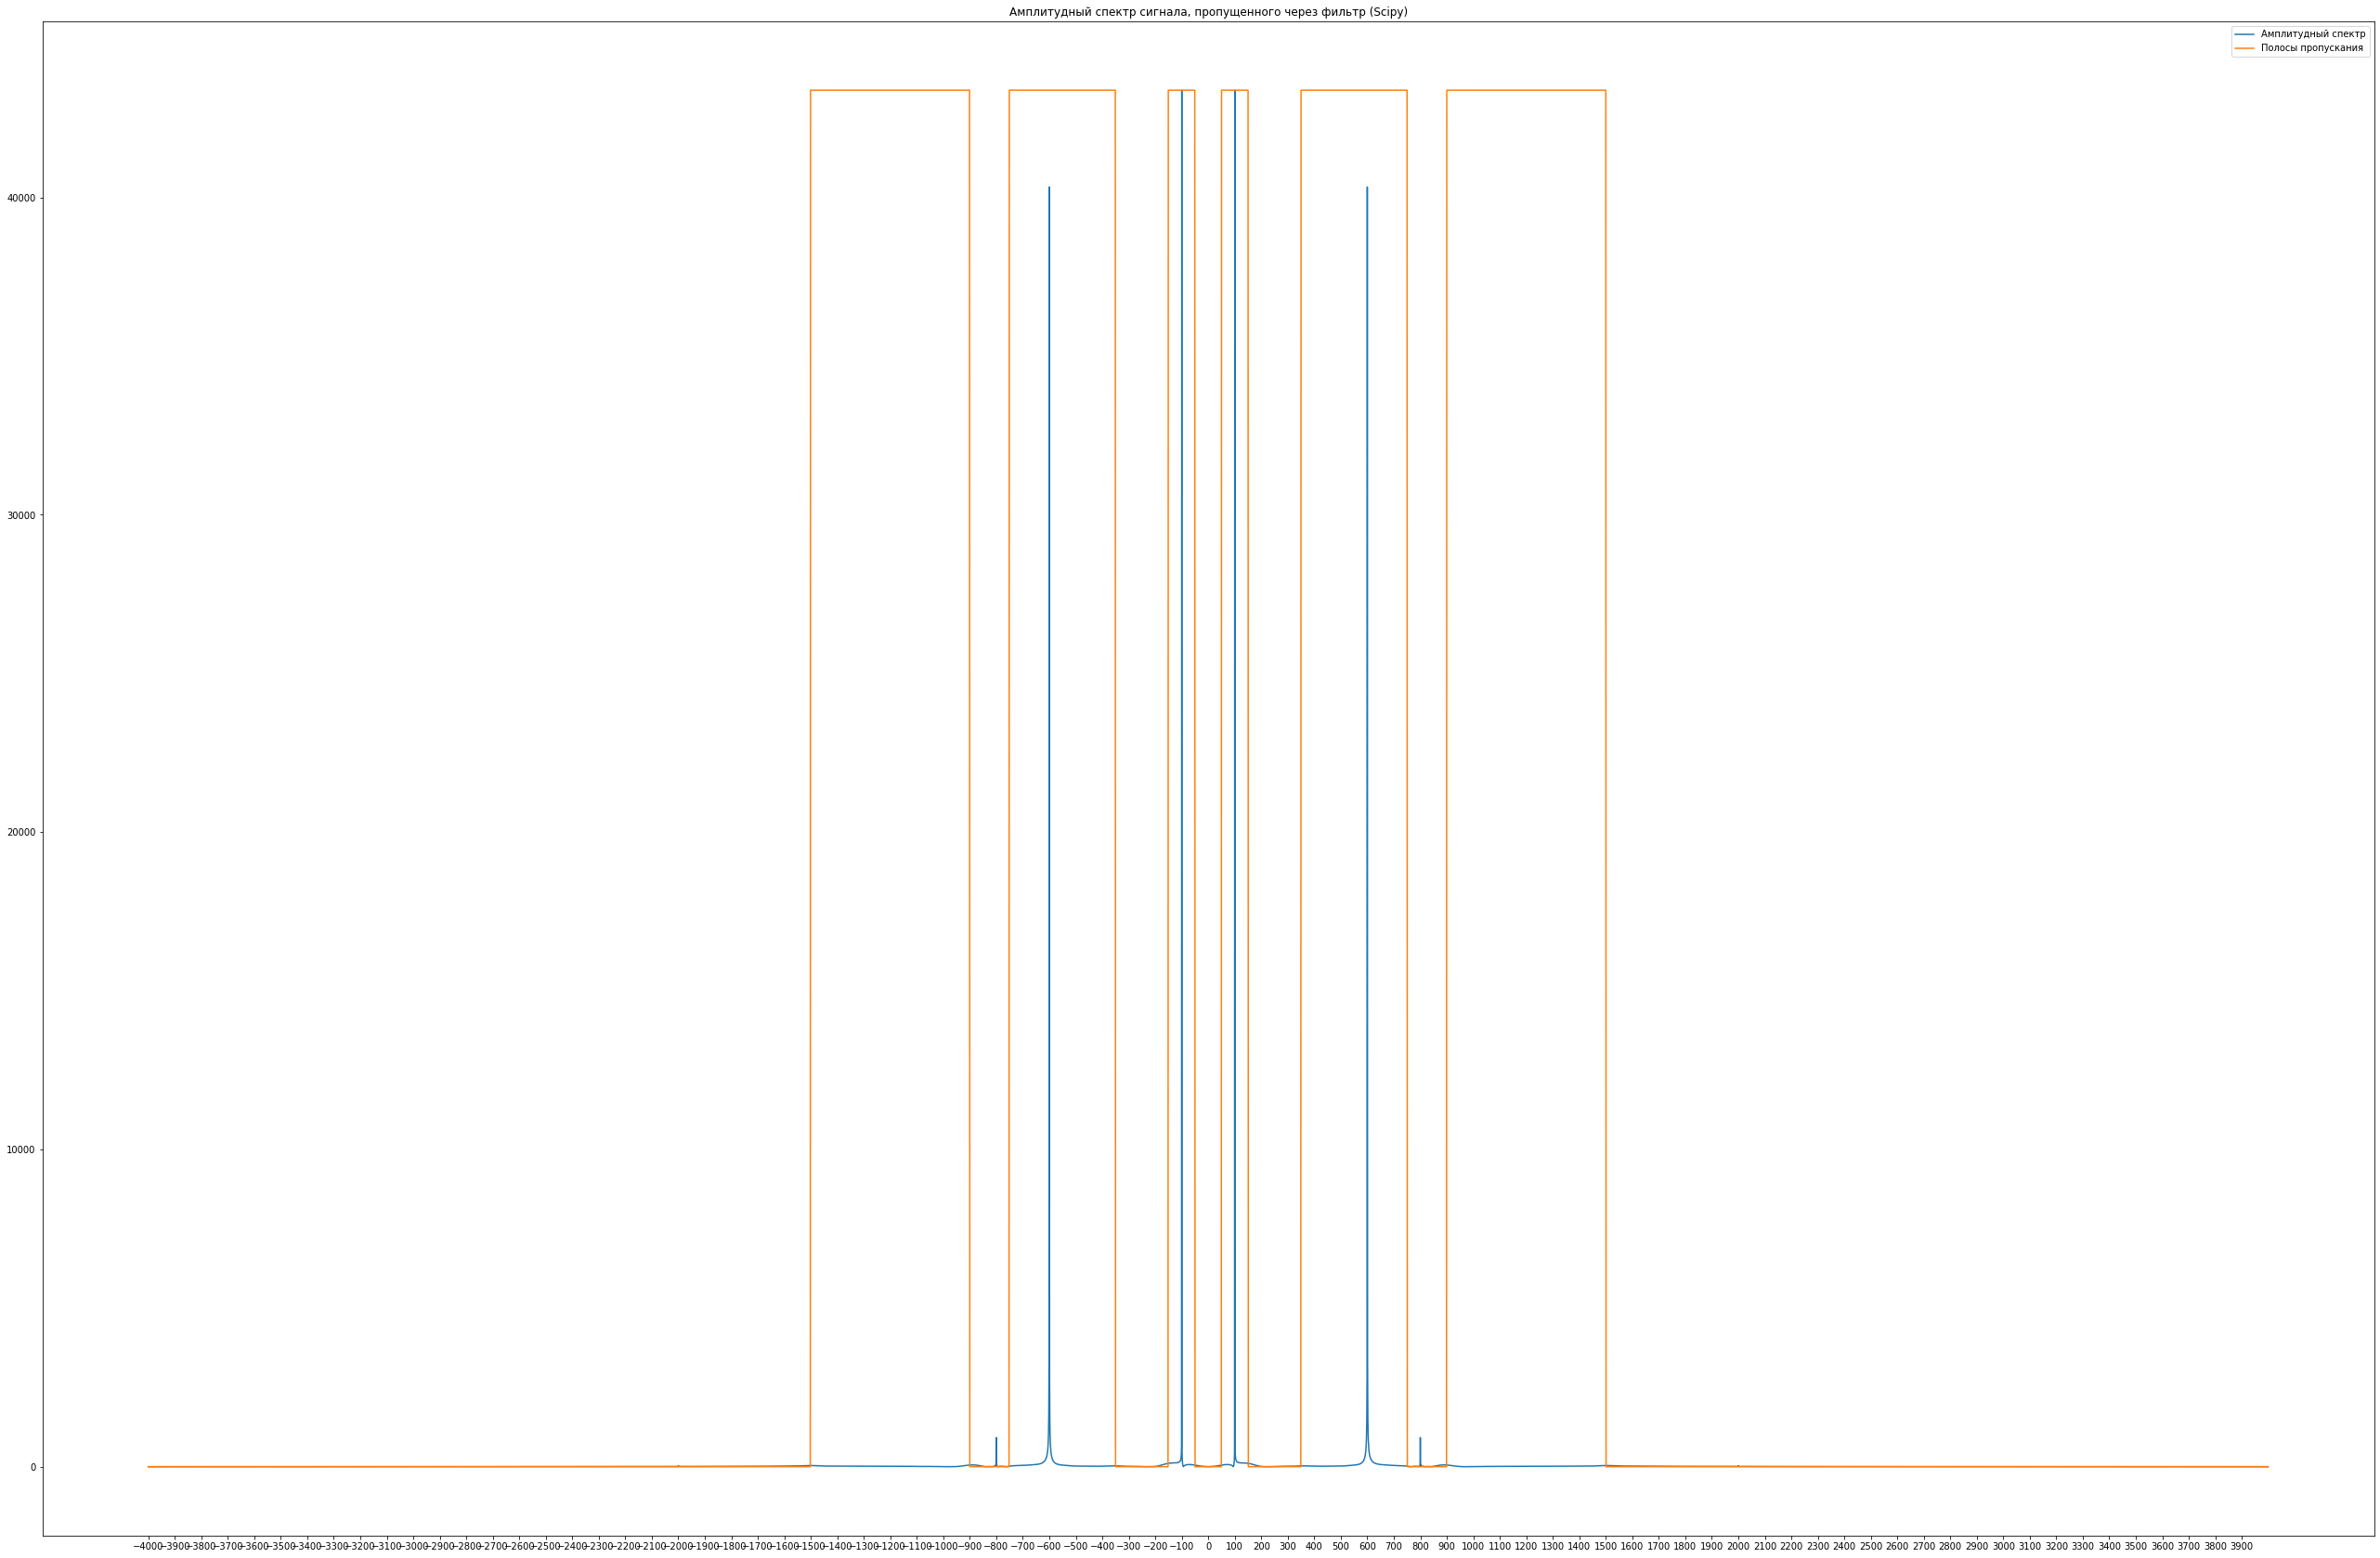

In [ ]:
discr_fourier_pts_res_fun = abs(np.fft.fftshift(np.fft.fft(res_sig_fun)))
max_dfp_fun = max(discr_fourier_pts_res_fun)
Ad_max = [a * max_dfp_fun for a in Ad] # нормализация Ad для вывода полос пропускания (изначально Ad принимает только значения 0/1)

plt.figure(figsize=(45, 30))
plt.title("Амплитудный спектр сигнала, пропущенного через фильтр (Scipy)")
plt.xticks(x_s)
plt.plot(fk_8_khz, discr_fourier_pts_res_fun)
plt.plot(fk_8_khz, Ad_max)
plt.legend(["Амплитудный спектр", "Полосы пропускания"])